In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [125]:
C_filepath = "C_arr_MF_fixed.csv"
#SvN_filepath = "data/XXZ_B_0.005/SvN_array_MF.csv"

df_C = pd.read_csv(C_filepath)
#df_SvN = pd.read_csv(SvN_filepath)

In [154]:
R = 40 # 23, which corresponds to C_r_t_80 due to bullshit reasons lol
N = 201
dt = 0.005
C_r_t_40 = df_C.to_numpy()
C_r_t_40 = C_r_t_40[:,0]
times = np.linspace(0.005,100,num=20000)
times = times[:-1]

#times = df_C["times"].to_numpy()
#chi = df_C["chi"].to_numpy()
#SvN = df_SvN.to_numpy() #MAY HAVE TO TRANSPOSE THIS
#C_r_t_5 = df_C["C_5"].to_numpy()
# C_r_t_10 = df_C["C_10"].to_numpy()
# C_r_t_20 = df_C["C_20"].to_numpy()
# C_r_t_30 = df_C["C_30"].to_numpy()
# C_r_t_40 = df_C["C_40"].to_numpy()
# C_r_t_50 = df_C["C_50"].to_numpy()
# C_r_t_60 = df_C["C_60"].to_numpy()
# C_r_t_70 = df_C["C_70"].to_numpy()
# C_r_t_80 = df_C["C_80"].to_numpy()
# C_r_t_90 = df_C["C_90"].to_numpy()


95.0


C:\Users\rache\AppData\Local\Temp\ipykernel_15068\1952580085.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(times, np.log(C_r_t_40))


([<matplotlib.axis.XTick at 0x18ef0646010>,
 [Text(0.005, 0, '0'),
  Text(5.005, 0, '5'),
  Text(10.005, 0, '10'),
  Text(15.005, 0, '15'),
  Text(20.005, 0, '20'),
  Text(25.005, 0, '25'),
  Text(30.005, 0, '30'),
  Text(35.005, 0, '35'),
  Text(40.005, 0, '40'),
  Text(45.005, 0, '45'),
  Text(50.005, 0, '50'),
  Text(55.005, 0, '55'),
  Text(60.005, 0, '60'),
  Text(65.005, 0, '65'),
  Text(70.005, 0, '70'),
  Text(75.005, 0, '75'),
  Text(80.005, 0, '80'),
  Text(85.005, 0, '85'),
  Text(90.005, 0, '90'),
  Text(95.005, 0, '95'),
  Text(100.005, 0, '100')])

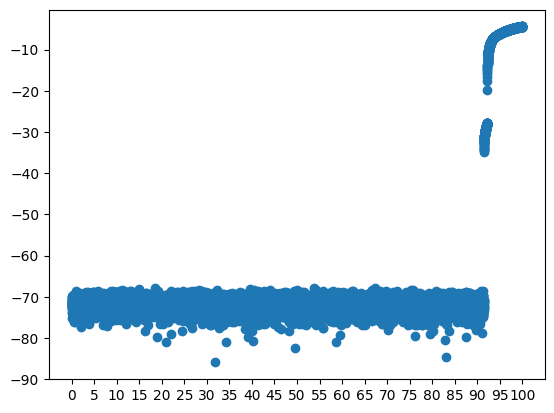

In [148]:
plt.scatter(times, np.log(C_r_t_40))
plt.xticks(np.arange(times.min(),times.max()+5,5))

In [155]:
t_sat = 95.0
stop_index = np.where(np.logical_and(times>t_sat-0.00001, times<t_sat + dt))
stop_index = int(stop_index[0])
print(stop_index)


18999


C:\Users\rache\AppData\Local\Temp\ipykernel_15068\419264517.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stop_index = int(stop_index[0])


In [156]:
indices = np.where(C_r_t_40 == 0.0)
last = indices[-1][-1]
time_data = np.real(times[last+1:stop_index])
C_data = np.real(C_r_t_40[last+1:stop_index])

In [157]:
def C_early(t,lambda_p,p,v_B,r=R):
    return -lambda_p * ((r/v_B - t)**(1+p))/(t**p)

In [158]:
def bound_vB(r_val,t_saturate):
    return r_val/t_saturate

In [159]:
guess = [1.9, 0.6, 0.3]
# lambda_p, p, v_B
bounds=((-np.inf, -np.inf, -np.inf), (np.inf, np.inf, bound_vB(R,t_sat)))

popt, pcov = curve_fit(C_early, time_data, C_data, p0=guess, bounds=bounds)

popt

array([-8.66806176, 17.15676346,  0.36443343])

In [164]:
params = [1.9,0.6,0.3]

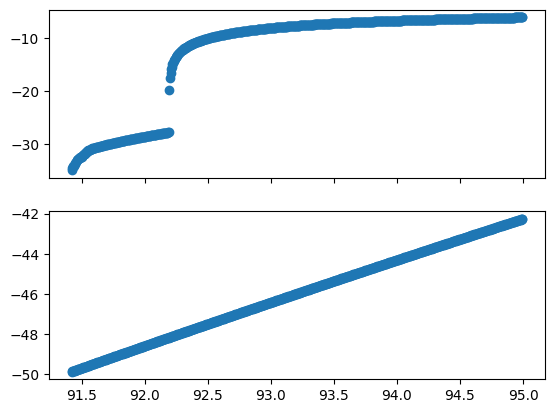

In [165]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(time_data,np.log(C_data))
ax[1].scatter(time_data, C_early(time_data,*params))

Text(0, 0.5, 'log(C(r,t))')

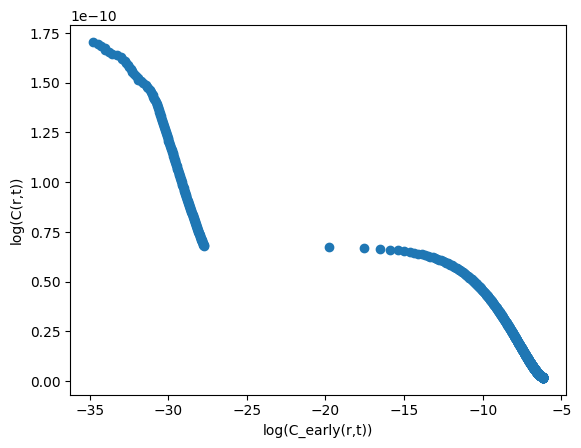

In [166]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.log(C_data),C_early(time_data,*popt))
ax.set_xlabel("log(C_early(r,t))")
ax.set_ylabel("log(C(r,t))")